# Match Analysis

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Cleaning and Exploration

In [2]:
matches = pd.read_csv("matches.csv" , index_col = "id")
matches = matches.iloc[:,:-3]

In [3]:
matches.shape

(756, 14)

In [4]:
matches.winner.unique()

array(['Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan, 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

## Taking in consideration KKR VS KXIP matches

In [5]:
KK =matches[np.logical_or(np.logical_and(matches['team1']=='Kolkata Knight Riders',matches['team2']=='Kings XI Punjab'),
                            np.logical_and(matches['team2']=='Kolkata Knight Riders',matches['team1']=='Kings XI Punjab'))]

In [6]:
KK.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens
48,2017,Chandigarh,2017-05-09,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kings XI Punjab,14,0,MM Sharma,"Punjab Cricket Association IS Bindra Stadium, ..."
81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali"
112,2008,Kolkata,2008-05-25,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kolkata Knight Riders,0,3,Umar Gul,Eden Gardens
123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead


In [7]:
KK.shape

(25, 14)

In [8]:
KK.season.unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019], dtype=int64)

In [9]:
KK.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

In [10]:
KK.describe().iloc[:,2:].T

,count,mean,std,min,25%,50%,75%,max
win_by_runs,25.0,7.84,12.092284,0.0,0.0,0.0,11.0,39.0
win_by_wickets,25.0,3.44,3.618011,0.0,0.0,3.0,7.0,9.0


## HEAD TO HEAD

Text(0.5, 1.0, 'KKR VS KXIP-head to head')

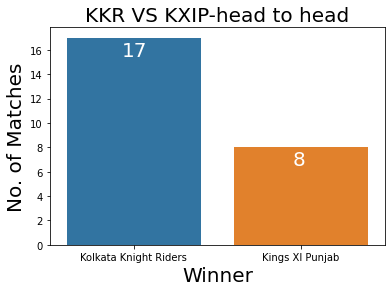

In [11]:
sns.countplot(KK["winner"])
plt.text(-0.07,15.5,str(KK['winner'].value_counts()['Kolkata Knight Riders']),size=20,color='white')
plt.text(0.95,6.5,str(KK['winner'].value_counts()['Kings XI Punjab']),size=20,color='white')
plt.xlabel('Winner',fontsize=20)
plt.ylabel('No. of Matches',fontsize=20)
plt.title('KKR VS KXIP-head to head',fontsize = 20)

In [12]:
Season_wise_Match_Winner = pd.DataFrame(KK.groupby(["season","winner"])["winner"].count())

Season_wise_Match_Winner.columns = ["winner count"]

print("Season wise winner of matches between KKR VS KXIP :")
Season_wise_Match_Winner

Season wise winner of matches between KKR VS KXIP :


winner count
season winner                             
2008   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2009   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2010   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2011   Kolkata Knight Riders             1
2012   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2013   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2014   Kings XI Punjab                   1
       Kolkata Knight Riders             3
2015   Kolkata Knight Riders             2
2016   Kolkata Knight Riders             2
2017   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2018   Kings XI Punjab                   1
       Kolkata Knight Riders             1
2019   Kolkata Knight Riders             2

## Winning Percentage

In [13]:
Winning_Percentage = KK['winner'].value_counts()/len(KK['winner'])

In [14]:
print("KKR winning percentage against KXIP(overall) : {}%".format(int(round(Winning_Percentage[0]*100))))
print("KXIP winning percentage against KKR(overall) : {}%".format(int(round(Winning_Percentage[1]*100))))

KKR winning percentage against KXIP(overall) : 68%
KXIP winning percentage against KKR(overall) : 32%


## Performance Analysis

In [15]:
def performance( team_name , given_df ):
    for value in given_df.groupby('winner'):
        if value[0] == team_name:

            total_win_by_runs = sum(list(value[1]['win_by_runs']))
            total_win_by_wickets = sum(list(value[1]['win_by_wickets']))
            
            if 0 in list(value[1]['win_by_runs'].value_counts().index):
                x = value[1]['win_by_runs'].value_counts()[0]
            else:
                x = 0
                
            if 0 in list(value[1]['win_by_wickets'].value_counts().index):
                y = value[1]['win_by_wickets'].value_counts()[0]
            else:
                y = 0
                
            number_of_times_given_team_win_while_defending = (len(value[1]) - x )
            number_of_times_given_team_win_while_chasing = (len(value[1]) - y )
            
            average_runs_by_which_a_given_team_wins_while_defending = total_win_by_runs / number_of_times_given_team_win_while_defending
            average_wickets_by_which_a_given_team_wins_while_chasing = total_win_by_wickets / number_of_times_given_team_win_while_chasing
            
            print('Number of times given team win while defending :' , number_of_times_given_team_win_while_defending ) 
            print('Number of times given team win while chasing   :' , number_of_times_given_team_win_while_chasing )
            print()
            print('Average runs by which a given team wins while defending  : ' ,round(average_runs_by_which_a_given_team_wins_while_defending))
            print('Average wickets by which a given team wins while chasing : ' ,round(average_wickets_by_which_a_given_team_wins_while_chasing))

In [16]:
performance("Kolkata Knight Riders",KK)

Number of times given team win while defending : 6
Number of times given team win while chasing   : 11

Average runs by which a given team wins while defending  :  24.0
Average wickets by which a given team wins while chasing :  6.0


In [17]:
performance("Kings XI Punjab",KK)

Number of times given team win while defending : 5
Number of times given team win while chasing   : 3

Average runs by which a given team wins while defending  :  10.0
Average wickets by which a given team wins while chasing :  8.0


## Toss Analysis

In [18]:
Toss_Decision = pd.DataFrame(KK.groupby(['toss_winner',"toss_decision"])["toss_decision"].count())

print ("Toss winner decision :")
Toss_Decision

Toss winner decision :


toss_decision
toss_winner           toss_decision               
Kings XI Punjab       bat                        5
                      field                      5
Kolkata Knight Riders bat                        3
                      field                     12

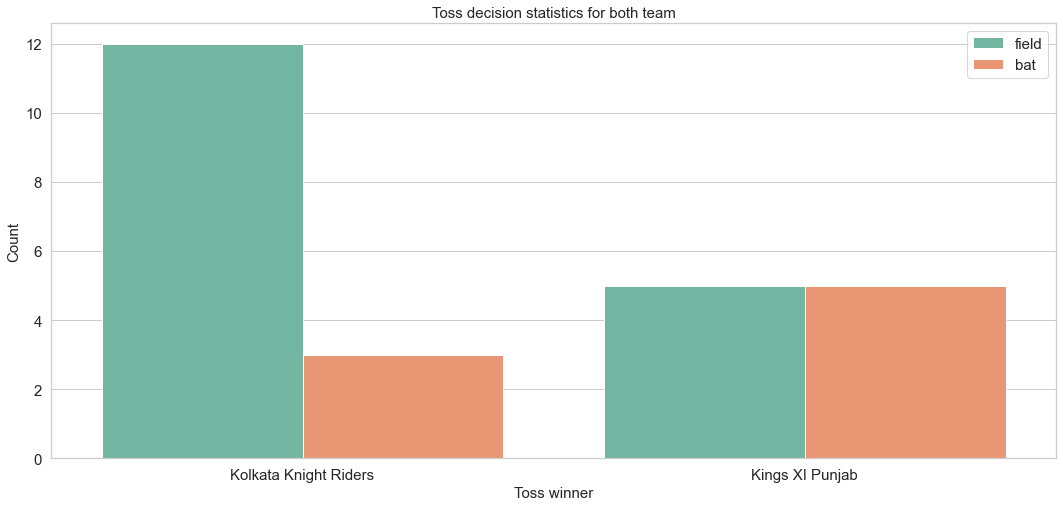

In [19]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,8))
sns.countplot(KK['toss_winner'],palette='Set2',hue=KK['toss_decision'])
plt.title('Toss decision statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc='best',fontsize=15)
plt.show()

In [20]:
Toss_Decision_based_Winner = pd.DataFrame(KK.groupby(['toss_winner',"toss_decision","winner"])["winner"].count())

print(" No of times toss winning decision leading to match winning : ")
Toss_Decision_based_Winner

 No of times toss winning decision leading to match winning : 


winner
toss_winner           toss_decision winner                       
Kings XI Punjab       bat           Kings XI Punjab             1
                                    Kolkata Knight Riders       4
                      field         Kings XI Punjab             1
                                    Kolkata Knight Riders       4
Kolkata Knight Riders bat           Kings XI Punjab             2
                                    Kolkata Knight Riders       1
                      field         Kings XI Punjab             4
                                    Kolkata Knight Riders       8

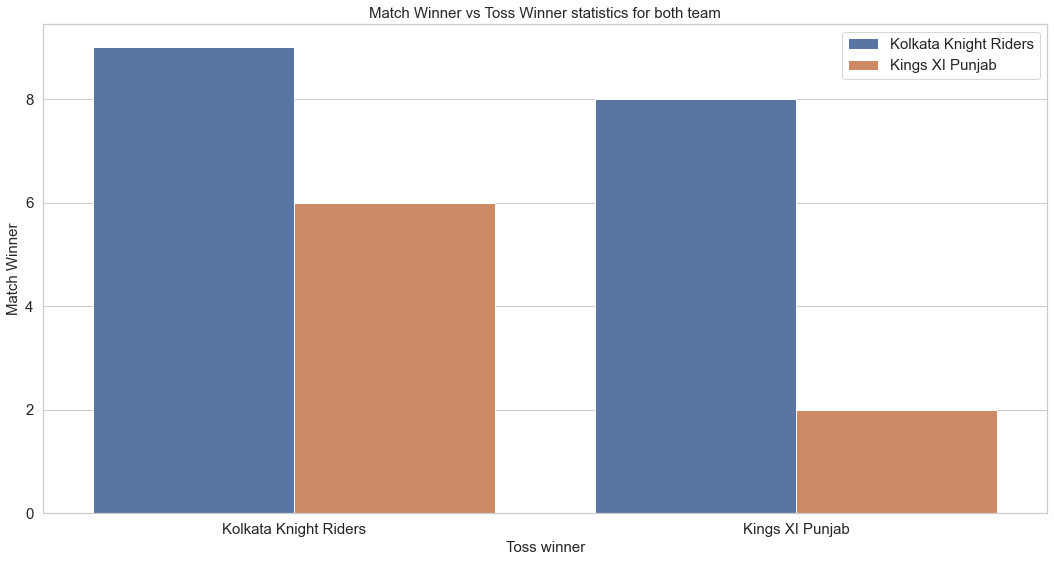

In [21]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KK['toss_winner'],hue=KK['winner'])
plt.title('Match Winner vs Toss Winner statistics for both team',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss winner',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc="best",fontsize=15)

### Toss Decision based Analysis of both the teams seperately :

In [22]:
KKR = KK[KK["toss_winner"]=="Kolkata Knight Riders"]
KXIP = KK[KK["toss_winner"]=="Kings XI Punjab"]

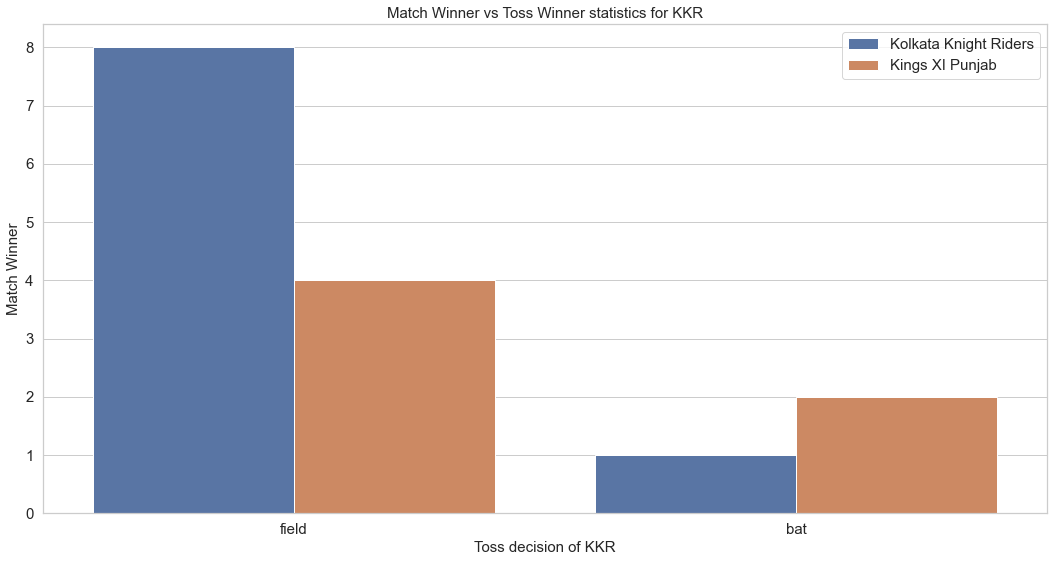

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KKR['toss_decision'],hue=KKR['winner'])
plt.title('Match Winner vs Toss Winner statistics for KKR',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KKR',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

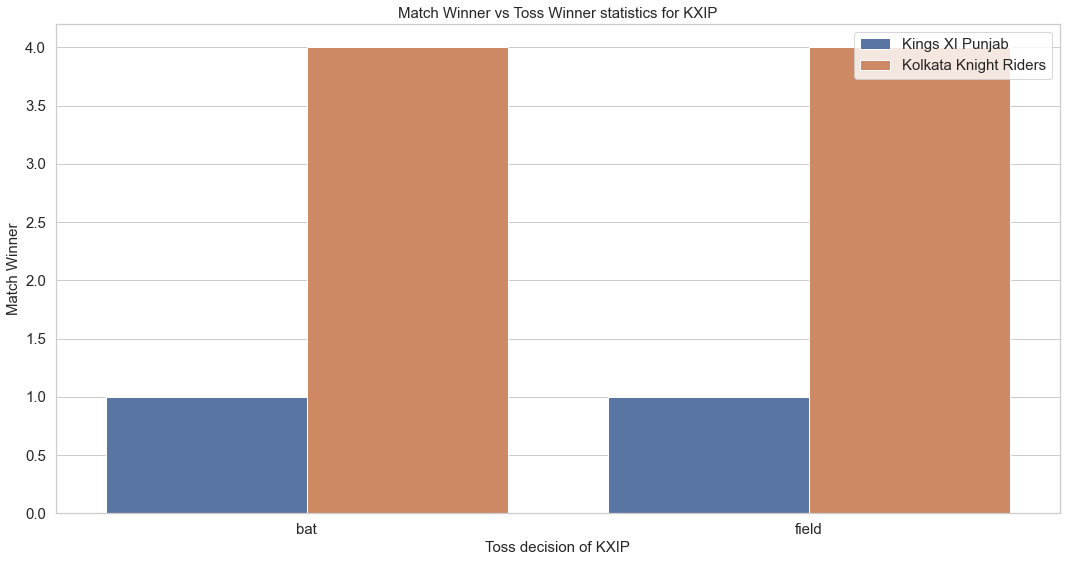

In [24]:
sns.set(style='whitegrid')
plt.figure(figsize = (18,9))
sns.countplot(KXIP['toss_decision'],hue=KXIP['winner'])
plt.title('Match Winner vs Toss Winner statistics for KXIP',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Toss decision of KXIP',fontsize=15)
plt.ylabel('Match Winner',fontsize=15)
plt.legend(loc=1,fontsize=15)

In [25]:
player_of_the_match = pd.DataFrame(KK.player_of_match.value_counts())

print("Man of the match :")

player_of_the_match

Man of the match :


,player_of_match
AD Russell,4
SP Narine,3
DPMD Jayawardene,2
G Gambhir,2
RV Uthappa,1
CH Gayle,1
UT Yadav,1
MK Tiwary,1
MS Gony,1
JH Kallis,1


## Recent Years Performance Analysis

In [26]:
cond2 = KK["season"] == 2018
cond3 = KK["season"] == 2019
final = KK[cond2 | cond3]
final

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
id,,,,,,,,,,,,,,
7911,2018,Kolkata,21/04/18,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,1,Kings XI Punjab,0,9,KL Rahul,Eden Gardens
7937,2018,Indore,12/05/18,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,31,0,SP Narine,Holkar Cricket Stadium
11142,2019,Kolkata,27/03/19,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kolkata Knight Riders,28,0,AD Russell,Eden Gardens
11343,2019,Mohali,03/05/19,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,S Gill,IS Bindra Stadium


In [27]:
final.shape

(4, 14)

In [28]:
player = pd.DataFrame(final.player_of_match.value_counts())

print("Man of the match :")
player

Man of the match :


,player_of_match
S Gill,1
KL Rahul,1
AD Russell,1
SP Narine,1


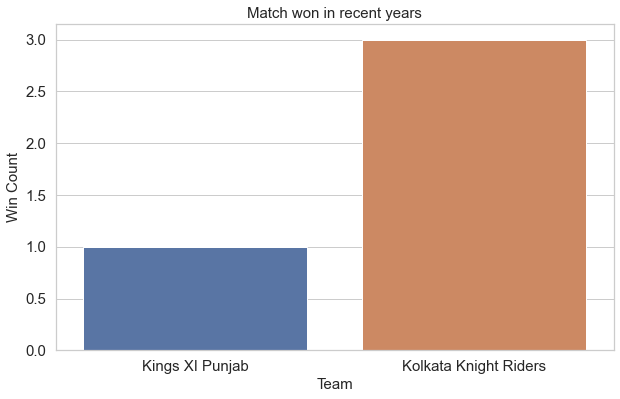

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(final['winner'])
plt.title('Match won in recent years',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.xlabel('Team',fontsize=15)
plt.ylabel('Win Count',fontsize=15)

plt.show()

Based on all the above analysis related to Head to Head , toss analysis , performance analysis , winning ratio , recent year performance etc we can predict that KKR to be favorite for this match and more better chances if they will chase the score.